In [1]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [130]:
df = pd.read_csv('used_cars_data.csv')
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [3]:
df.shape

(7253, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
df.select_dtypes(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,NaN
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,8.61 Lakh
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,NaN
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,NaN
...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,NaN
7249,Volkswagen Polo GT TSI,Mumbai,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,NaN
7250,Nissan Micra Diesel XV,Kolkata,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,NaN
7251,Volkswagen Polo GT TSI,Pune,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,NaN


In [6]:
df.duplicated().sum()

0

In [40]:
df.drop(['S.No.'], axis=1, inplace=True)

In [131]:
df['Mileage'].str.split()

0       [26.6, km/kg]
1       [19.67, kmpl]
2        [18.2, kmpl]
3       [20.77, kmpl]
4        [15.2, kmpl]
            ...      
7248    [20.54, kmpl]
7249    [17.21, kmpl]
7250    [23.08, kmpl]
7251     [17.2, kmpl]
7252     [10.0, kmpl]
Name: Mileage, Length: 7253, dtype: object

In [132]:
df[['Mileage','Mtr']] = df['Mileage'].str.split(" ", n=1, expand=True)
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mtr
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,1.75,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,NaN,17.74,kmpl


In [41]:
df['Mileage'] = df['Mileage'].str.replace('kmpl', '').str.replace('km/kg', '').str.replace(' ', '')
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2,1197 CC,103.6 bhp,5.0,NaN,NaN


In [42]:
df['Mileage'] = df['Mileage'].astype(float)

In [44]:
df['Engine'] = df['Engine'].str.replace('CC', '').str.replace(' ', '')
df['Power'] = df['Power'].str.replace('bhp', '').str.replace(' ', '')
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.8,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197,103.6,5.0,NaN,NaN


In [55]:
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


In [52]:
df['Power'] = np.where(df['Power'] == 'null', np.nan, df['Power'])

In [54]:
df['Power'].unique()

array(['58.16', '126.2', '88.7', '88.76', '140.8', '55.2', '63.1',
       '171.5', '103.6', '74', '103.25', '116.3', '187.7', '115',
       '175.56', '98.6', '83.8', '167.62', '190', '88.5', '177.01', '80',
       '67.1', '102', '108.45', '138.1', '184', '179.5', '103.5', '64',
       '82', '254.8', '73.9', '46.3', '37.5', '77', '82.9', '149.92',
       '138.03', '112.2', '163.7', '71', '105', '174.33', '75', '103.2',
       '53.3', '78.9', '147.6', '147.8', '68', '186', '170', '69', '140',
       '78', '194', '500', '108.5', '86.8', '187.74', nan, '132', '86.7',
       '73.94', '117.3', '218', '168.5', '89.84', '110', '90', '82.85',
       '67', '241.4', '35', '270.9', '126.32', '73', '130', '100.6',
       '150', '75.94', '215', '107.3', '37.48', '120', '178', '152',
       '91.1', '85.80', '362.07', '121.3', '143', '81.80', '171', '76.8',
       '103.52', '444', '362.9', '67.06', '120.7', '258', '81.86', '112',
       '88.73', '57.6', '157.75', '102.5', '201.1', '83.1', '68.05',
   

In [60]:
df.isnull().sum() / len(df)

Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.023758
Seats                0.006978
Price                0.000000
dtype: float64

In [58]:
df.drop('New_Price', axis=1, inplace=True)

In [59]:
df.dropna(subset = ['Price'], inplace=True)

In [61]:
df.dropna(inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


In [70]:
df.select_dtypes(include='object')

,Name,Location,Fuel_Type
0,Maruti Wagon R LXI CNG,Mumbai,CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel
2,Honda Jazz V,Chennai,Petrol
3,Maruti Ertiga VDI,Chennai,Diesel
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel
...,...,...,...
6014,Maruti Swift VDI,Delhi,Diesel
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,Diesel
6016,Mahindra Xylo D4 BSIV,Jaipur,Diesel
6017,Maruti Wagon R VXI,Kolkata,Petrol


In [65]:
df.describe(include='object')

,Name,Location,Fuel_Type,Transmission,Owner_Type
count,5872,5872,5872,5872,5872
unique,1811,11,4,2,4
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First
freq,49,775,3152,4170,4839


In [67]:
df['Transmission'].replace(['Automatic', 'Manual'], [0, 1], inplace=True)

In [69]:
df['Owner_Type'].replace(['First', 'Second', 'Fourth & Above', 'Third'], [1, 2, 4, 3], inplace=True)

In [71]:
df.drop('Name', axis=1, inplace=True)

In [73]:
dummies = pd.get_dummies(data = df, columns = ['Location', 'Fuel_Type'], drop_first=True)

In [74]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 5872 non-null   int64  
 1   Kilometers_Driven    5872 non-null   int64  
 2   Transmission         5872 non-null   int64  
 3   Owner_Type           5872 non-null   int64  
 4   Mileage              5872 non-null   float64
 5   Engine               5872 non-null   float64
 6   Power                5872 non-null   float64
 7   Seats                5872 non-null   float64
 8   Price                5872 non-null   float64
 9   Location_Bangalore   5872 non-null   bool   
 10  Location_Chennai     5872 non-null   bool   
 11  Location_Coimbatore  5872 non-null   bool   
 12  Location_Delhi       5872 non-null   bool   
 13  Location_Hyderabad   5872 non-null   bool   
 14  Location_Jaipur      5872 non-null   bool   
 15  Location_Kochi       5872 non-null   bool  

<Axes: xlabel='Kilometers_Driven'>

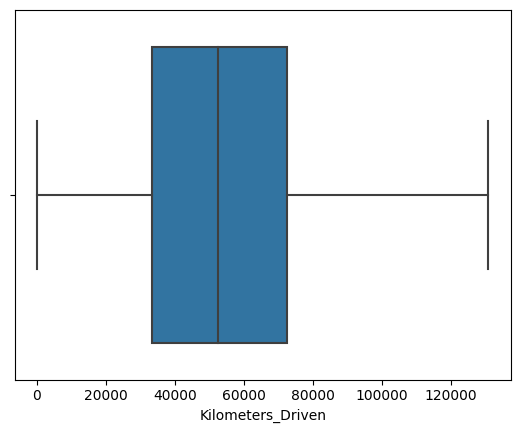

In [76]:
sns.boxplot(data = df, x = 'Kilometers_Driven', showfliers=False)

In [77]:
def outlier(col):
    
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    
    return lw, uw

In [78]:
outlier(df['Kilometers_Driven'])

(-25047.875, 130873.125)

In [81]:
for i in ['Kilometers_Driven', 'Engine', 'Power', 'Mileage']:
    
    lw, uw = outlier(dummies[i])
    
    dummies[i] = np.where(dummies[i] < lw, lw, dummies[i])
    dummies[i] = np.where(dummies[i] > uw, uw, dummies[i])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Power'>

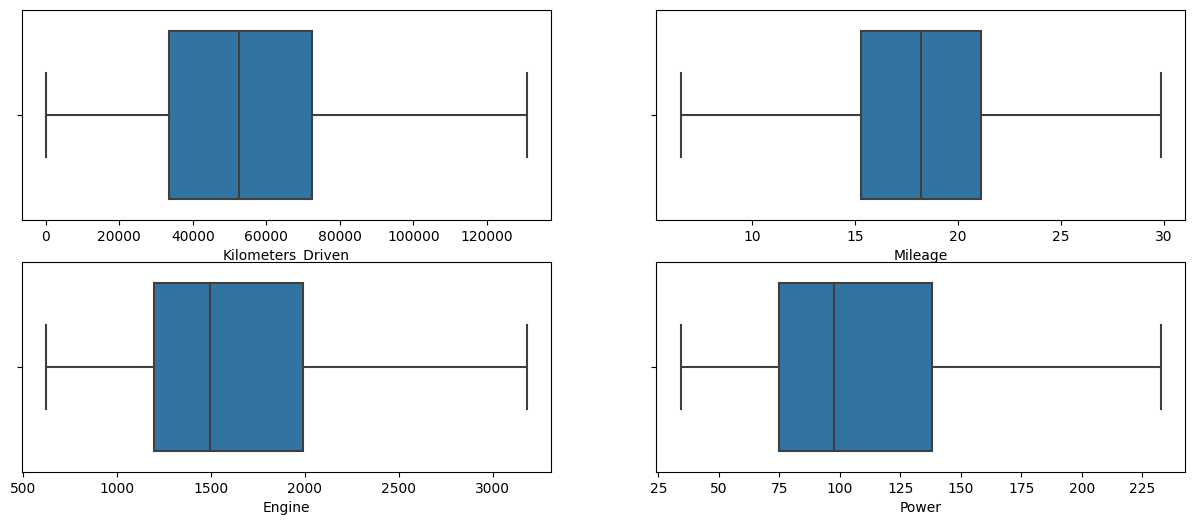

In [82]:
plt.figure(figsize = (15, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x = dummies['Kilometers_Driven'])

plt.subplot(2, 2, 2)
sns.boxplot(x = dummies['Mileage'])

plt.subplot(2, 2, 3)
sns.boxplot(x = dummies['Engine'])

plt.subplot(2, 2, 4)
sns.boxplot(x = dummies['Power'])

In [83]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5872 entries, 0 to 6018
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 5872 non-null   int64  
 1   Kilometers_Driven    5872 non-null   float64
 2   Transmission         5872 non-null   int64  
 3   Owner_Type           5872 non-null   int64  
 4   Mileage              5872 non-null   float64
 5   Engine               5872 non-null   float64
 6   Power                5872 non-null   float64
 7   Seats                5872 non-null   float64
 8   Price                5872 non-null   float64
 9   Location_Bangalore   5872 non-null   bool   
 10  Location_Chennai     5872 non-null   bool   
 11  Location_Coimbatore  5872 non-null   bool   
 12  Location_Delhi       5872 non-null   bool   
 13  Location_Hyderabad   5872 non-null   bool   
 14  Location_Jaipur      5872 non-null   bool   
 15  Location_Kochi       5872 non-null   bool  

In [109]:
dummies['log_price'] = np.log(dummies['Price'])

In [110]:
X = dummies.drop(['Price', 'log_price'], axis=1)
y = dummies['log_price']

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [112]:
reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [113]:
reg.score(X_train, y_train)

0.8986128246323688

In [114]:
reg.score(X_test, y_test)

0.8878331268563687

In [115]:
X_c = sm.add_constant(X)

X_c_train, X_c_test, y_train, y_test = train_test_split(X_c, y, test_size=0.3, random_state=42)

In [116]:
model = sm.OLS(y_train, X_c_train.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1725.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:53:49   Log-Likelihood:                -538.31
No. Observations:                4110   AIC:                             1121.
Df Residuals:                    4088   BIC:                             1260.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -225.6329      3.934    -57.356      0.000    -233.346    -217.920
Year                    0.1126      0.002     57.476      0.000       0.109       0.116
Kilometers_Driven   -2.504e-06   1.97e-07    -12.728      0.000   -2.89e-06   -2.12e-06
Transmission           -0.2046      0.013    -15.185      0.000      -0.231      -0.178
Owner_Type             -0.0537      0.011     -5.033      0.000      -0.075      -0.033
Mileage                -0.0099      0.002     -5.187      0.000      -0.014      -0.006
Engine                  0.0003   2.21e-05     12.103      0.000       0.000       0.000
Power                   0.0089      0.000     37.588      0.000       0.008       0.009
Seats                  -0.0333      0.007     -4.582      0.000      -0.048      -0.019
Location_Bangalore      0.1271      0.029      4.449      0.000       0.071       0.183
Location_Chennai        0.0256      0.027      0.948      0.343      -0.027       0.079
Location_Coimbatore     0.0830      0.026      3.177      0.001       0.032       0.134
Location_Delhi         -0.0568      0.027     -2.137      0.033      -0.109      -0.005
Location_Hyderabad      0.1344      0.026      5.245      0.000       0.084       0.185
Location_Jaipur        -0.0474      0.028     -1.719      0.086      -0.102       0.007
Location_Kochi         -0.0304      0.026     -1.155      0.248      -0.082       0.021
Location_Kolkata       -0.2397      0.027     -8.938      0.000      -0.292      -0.187
Location_Mumbai        -0.0700      0.025     -2.747      0.006      -0.120      -0.020
Location_Pune          -0.0469      0.026     -1.785      0.074      -0.098       0.005
Fuel_Type_Diesel        0.1533      0.046      3.319      0.001       0.063       0.244
Fuel_Type_LPG          -0.0112      0.115     -0.098      0.922      -0.236       0.213
Fuel_Type_Petrol       -0.1039      0.047     -2.212      0.027      -0.196      -0.012
==============================================================================
Omnibus:                      350.037   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1302.965
Skew:                          -0.371   Prob(JB):                    1.16e-283
Kurtosis:                       5.657   Cond. No.                     5.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
X_c_train.drop('Owner_Type', axis=1, inplace=True)
X_c_test.drop('Owner_Type', axis=1, inplace=True)

In [117]:
pred = model.predict(X_c_test)

In [118]:
(mean_squared_error(y_test, pred)) ** 0.5

0.2874155544814012

In [119]:
rmse = pd.DataFrame({'Actual': y_test, 'Pred': y_train.mean()})
(mean_squared_error(rmse['Actual'], rmse['Pred'])) ** 0.5

0.8585700814024113

In [120]:
0.28/0.85

0.3294117647058824

In [129]:
np.log1p(df['Price'])

0       1.011601
1       2.602690
2       1.704748
3       1.945910
4       2.930660
          ...   
6014    1.749200
6015    1.609438
6016    1.360977
6017    1.294727
6018    1.252763
Name: Price, Length: 5872, dtype: float64

In [121]:
residual = y_test - pred

In [122]:
residual.mean()

-0.011147069507806032

<Axes: ylabel='Density'>

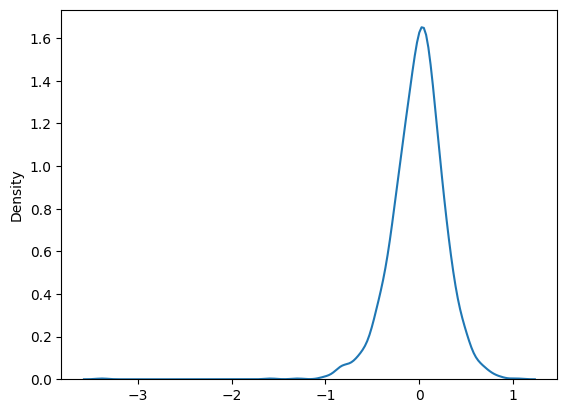

In [123]:
sns.kdeplot(residual)

<Axes: >

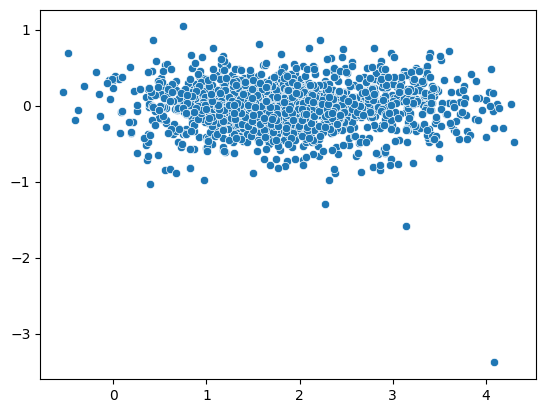

In [124]:
sns.scatterplot(x = pred, y = residual)

<Axes: xlabel='Price', ylabel='Density'>

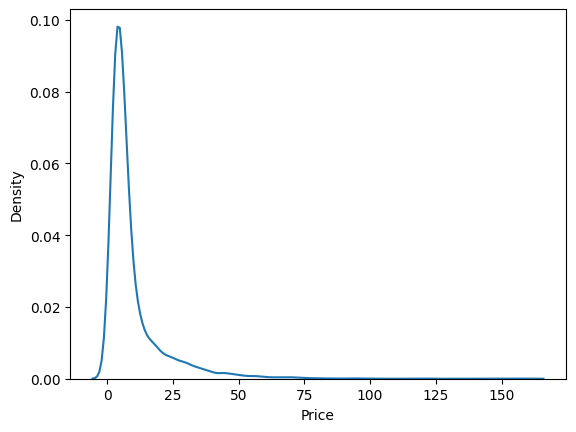

In [108]:
sns.kdeplot(df['Price'])